In [229]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [230]:
def Tukeys_fence(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    X1 = Q1 - 1.5 * (Q3 - Q1) 
    X2 = Q3 + 1.5 * (Q3 - Q1)
    outlier = df.index[(X1 > df[column]) | (df[column] > X2)]
    df.loc[outlier,column] = mean_train

In [231]:
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')

In [232]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
mean_Age = train['Age'].mean()
mean_train = train['Fare'].mean()

In [234]:
#sns.lmplot('SibSp','Survived',train)

In [235]:
#sns.lmplot('Parch','Survived',train)

In [236]:
test = test.fillna(0)
train = train.fillna(0)

In [237]:
train.loc[train["SibSp"] == 8,"SibSp"] = 5
test.loc[test["SibSp"] == 8,"SibSp"] = 5
train.loc[train["Parch"] == 6,"Parch"] = 4
test.loc[test["Parch"] == 6,"Parch"] = 4
train.loc[train["Cabin"] != 0,"Cabin"] = 1
test.loc[test["Cabin"] != 0,"Cabin"] = 1
train.loc[train["Sex"] == "male","Sex"] = 0
train.loc[train["Sex"] == "female","Sex"] = 1
test.loc[test["Sex"] == "male","Sex"] = 0
test.loc[test["Sex"] == "female","Sex"] = 1
train.loc[train["Age"] == 0,"Age"] = mean_Age
test.loc[test["Age"] == 0,"Age"] = mean_Age
train.loc[train["Embarked"] == "S","Embarked"] = 0
train.loc[train["Embarked"] == "C","Embarked"] = 1
train.loc[train["Embarked"] == "Q","Embarked"] = 2
test.loc[test["Embarked"] == "S","Embarked"] = 0
test.loc[test["Embarked"] == "C","Embarked"] = 1
test.loc[test["Embarked"] == "Q","Embarked"] = 2

{'whiskers': [<matplotlib.lines.Line2D at 0x24d780afb70>,
 'caps': [<matplotlib.lines.Line2D at 0x24d780aff98>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d780af780>],
 'medians': [<matplotlib.lines.Line2D at 0x24d780ba8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d780bac18>],
 'means': []}

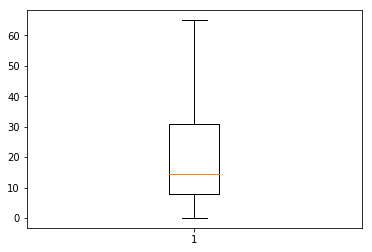

In [242]:
plt.boxplot(train['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24d7810f630>,
 'caps': [<matplotlib.lines.Line2D at 0x24d7810fcc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d7810f240>],
 'medians': [<matplotlib.lines.Line2D at 0x24d78118390>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d781186d8>],
 'means': []}

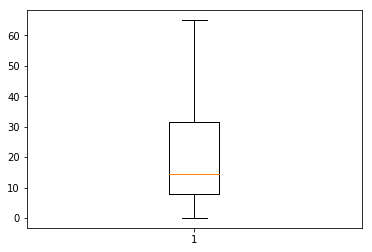

In [243]:
plt.boxplot(test['Fare'])

In [240]:
Tukeys_fence(train,'Fare')

In [241]:
Tukeys_fence(test,'Fare')

In [244]:
Surv_train = train['Survived']
Id = test['PassengerId']
train.drop(['Survived','Name','Ticket','PassengerId'], axis='columns', inplace=True)
test.drop(['Name','Ticket','PassengerId'], axis='columns', inplace=True)

In [245]:
normalized_train = preprocessing.normalize(train)
normalized_test = preprocessing.normalize(test)
decision = ExtraTreesClassifier(n_estimators=500)

In [246]:
#X_train, X_test, y_train, y_test = train_test_split(normalized_train, Surv_train, test_size=0.25, random_state=42)
#decision.fit(X_train, y_train)
#pred = decision.predict(X_test)
#print('Accuracy: \n', accuracy_score(y_test, pred, normalize = True))

In [247]:
decision.fit(normalized_train, Surv_train)
pred = decision.predict(normalized_test)
preds = pd.Series(pred)

In [248]:
d = {"PassengerId":Id, "Survived": preds}
df1 = pd.DataFrame(d)
df1.to_csv('answer.csv', index = False)